# Imports and settings

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from utils import *
from models import *

In [4]:
# Define mpmath precision
mp.mp.dps = 30
mp.mp.pretty = False

# Logistic map iterations

In [3]:
r = 2.9
x0 = .3
logistic_map(r, x0, mpf=False)

0.609

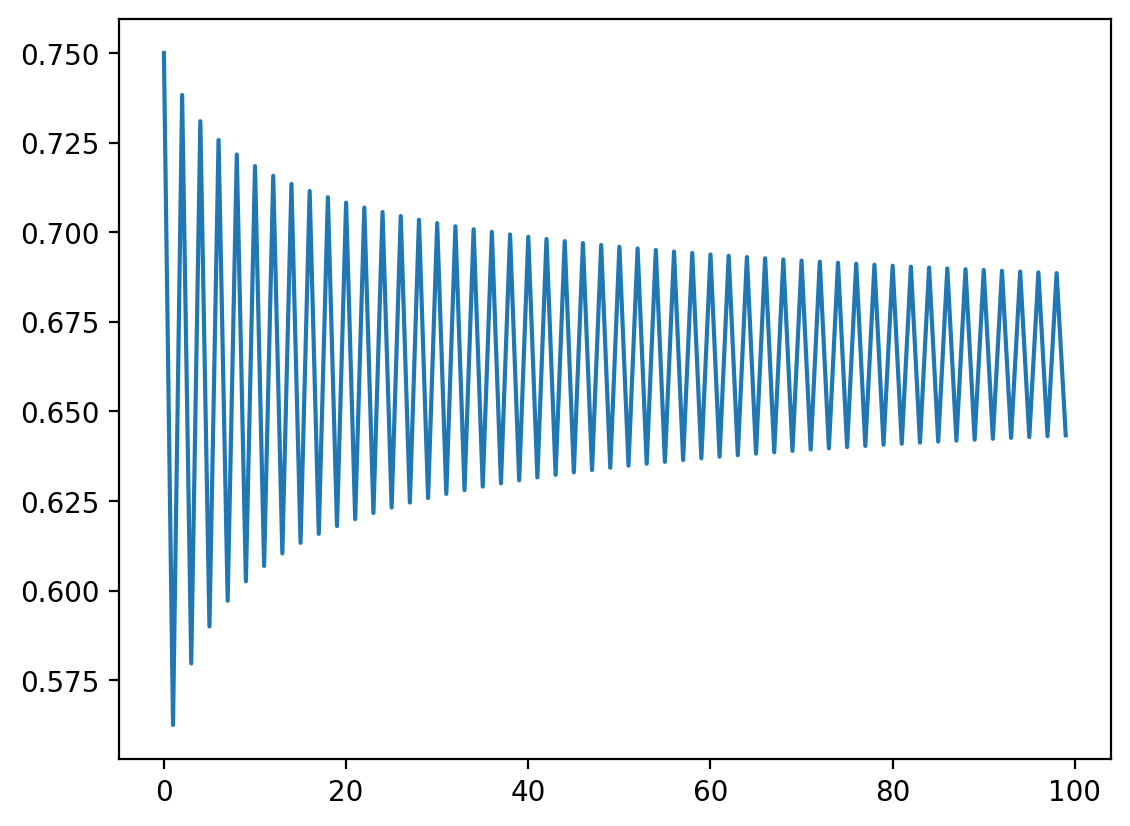

In [12]:
f = logistic_map
r = 3.
x0 = .5
N = 100

series = generate_series(f, r, x0, N)
plt.plot(series, marker='');

In [28]:
#from collections import Counter
#len(Counter(rounded_series))

2

# Count unique values in a series

2 unique values out of 900000


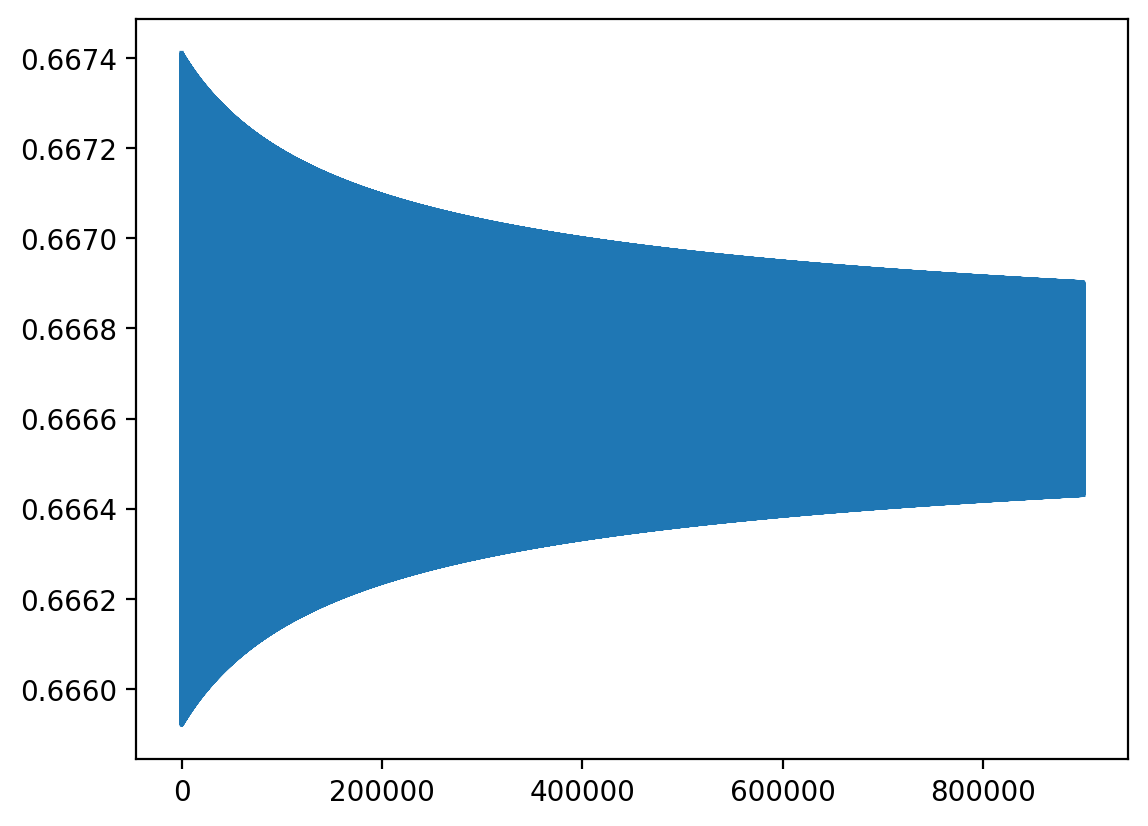

In [26]:
f = logistic_map
r = 3.
x0 = .5
N = 1e6

# Generate series and take last 10% of the data
series = generate_series(f, r, x0, int(N))[int(N * .1):]
plt.plot(series, marker='');

# Round values to eliminate numerical noise
rounded_series = np.round(series, 3)
#rounded_series = array_round(series, 3)

# Count unique values
unique_values = np.unique(rounded_series)
unique_count = len(unique_values)
print(f"{unique_count} unique values out of {len(series)}")

# Bifurcation points

In [11]:
f = logistic_map
x0 = .5

fparam_range = (2.9, 4)
fparam_step_size = 1e-2
parameter_values = np.arange(*fparam_range, fparam_step_size)

N = int(1e6)
tolerance = 1e-3

print(f"series length = {parameter_values.size}\n")
print("param     unique count")
print("________________________")

for parameter in parameter_values:
             
    series = generate_series(f, parameter, x0, int(N))[-1000:]
    rounded_series = np.round(series, decimals=int(-np.log10(tolerance)))
    unique_values = np.unique(rounded_series)
    unique_count = unique_values.size

    print(f"{round(parameter, 3)}           {unique_count}")

series length = 110

param     unique count
________________________
2.9           1
2.91           1
2.92           1
2.93           1
2.94           1
2.95           1
2.96           1
2.97           1
2.98           1
2.99           1
3.0           2
3.01           2
3.02           2
3.03           2
3.04           2
3.05           2
3.06           2
3.07           2
3.08           2
3.09           2
3.1           2
3.11           2
3.12           2
3.13           2
3.14           2
3.15           2
3.16           2
3.17           2
3.18           2
3.19           2
3.2           2
3.21           2
3.22           2
3.23           2
3.24           2
3.25           2
3.26           2
3.27           2
3.28           2
3.29           2
3.3           2
3.31           2
3.32           2
3.33           2
3.34           2
3.35           2
3.36           2
3.37           2
3.38           2
3.39           2
3.4           2
3.41           2
3.42           2
3.43           2
3.44           2
3.

# Bifurcation digram

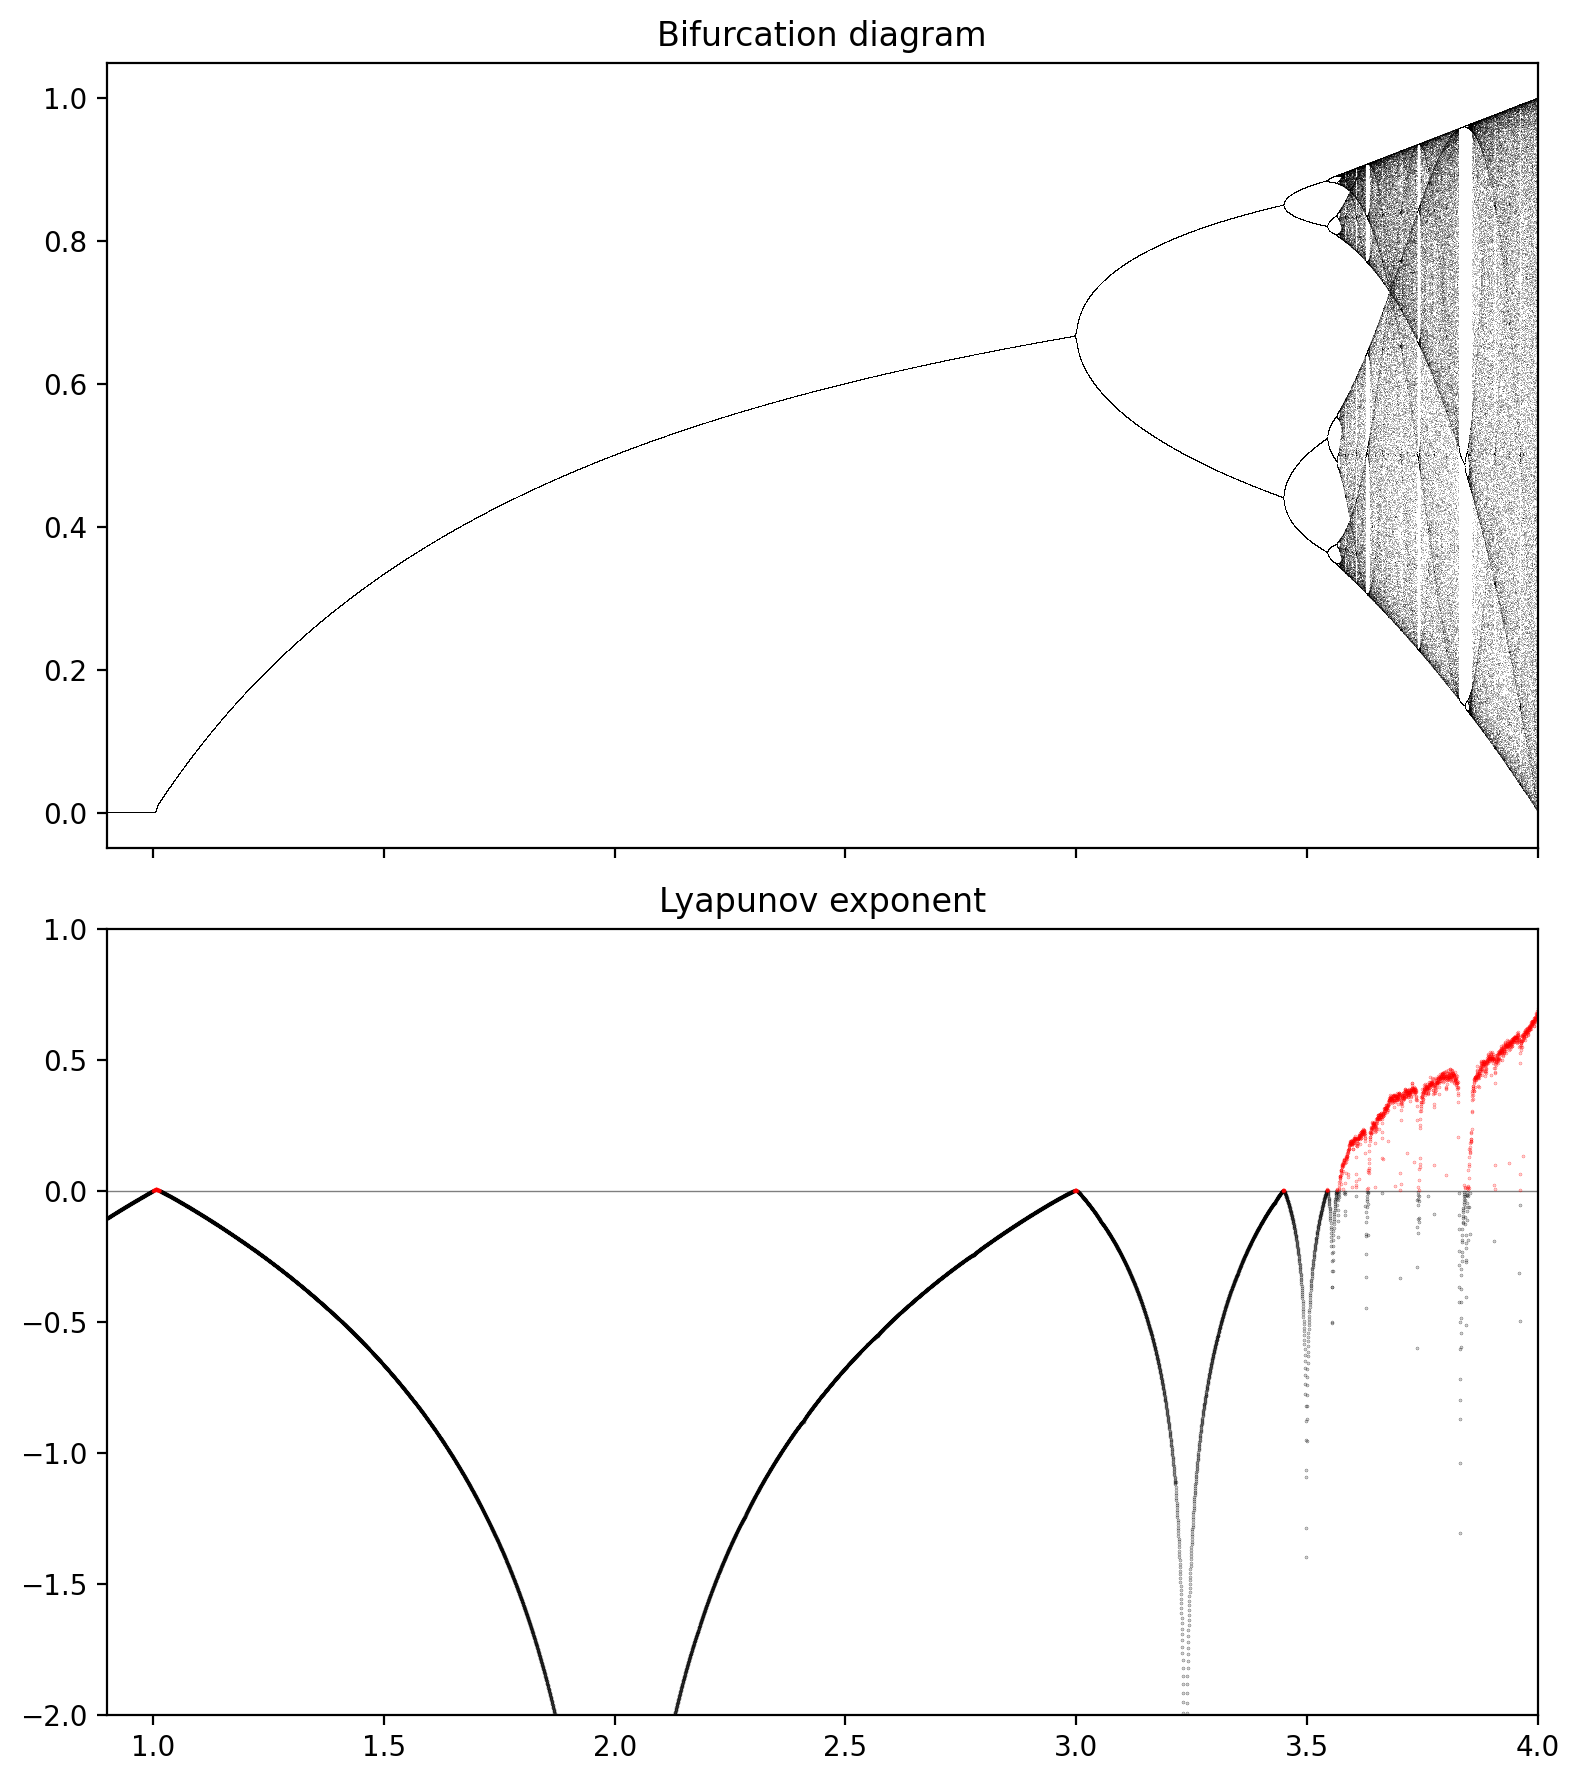

In [27]:
n = 10000
rrange = (.9, 4)
r = np.linspace(*rrange, n)

iterations = 1000
last = 100

x = 1e-5 * np.ones(n)

lyapunov = np.zeros(n)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9), sharex=True, dpi=100)
for i in range(iterations):
    
    x = logistic_map(r, x)
    
    # compute the partial sum of the Lyapunov exponent
    lyapunov += np.log(abs(r - 2 * r * x))
    
    ### display the bifurcation diagram
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
        
ax1.set_xlim(*rrange)
ax1.set_title("Bifurcation diagram")


### display the Lyapunov exponent

# horizontal line
ax2.axhline(0, color='k', lw=.5, alpha=.5)

# negative Lyapunov exponent
ax2.plot(r[lyapunov < 0], lyapunov[lyapunov < 0] / iterations, '.k', alpha=.5, ms=.5)

# positive Lyapunov exponent
ax2.plot(r[lyapunov >= 0],  lyapunov[lyapunov >= 0] / iterations, '.r', alpha=.5, ms=.5)

ax2.set_xlim(*rrange)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")

plt.tight_layout()

# Feigenbaum constant convergence

In [12]:
max_it = 13
max_it_j = 10
a1 = 1.0
a2 = 0.0
d1 = 3.2
a = 0.0

print (" i       d")
for i in range(2, max_it + 1):
    a = a1 + (a1 - a2) / d1
    for j in range(1, max_it_j + 1):
        x = 0.0
        y = 0.0
        for k in range(1, (1 << i) + 1):
            y = 1.0 - 2.0 * y * x
            x = a - x * x
        a = a - x / y
    d = (a1 - a2) / (a - a1)
    print("{0:2d}    {1:.8f}".format(i, d))
    d1 = d
    a2 = a1
    a1 = a

 i       d
 2    3.21851142
 3    4.38567760
 4    4.60094928
 5    4.65513050
 6    4.66611195
 7    4.66854858
 8    4.66906066
 9    4.66917155
10    4.66919515
11    4.66920026
12    4.66920098
13    4.66920537
